# Section: Simulation

In [1]:
from IBP_Sampler_Package.IBP_Sampler import IBP, log_likelyhood, sampler
import numpy as np
import matplotlib.pyplot as plt

We will be conducting our simulation based on the simulation laid out in Ilker Yildirim's paper and see how our algorithm compares. We will try with 2 different seeds to see if/how the results of the simulation change. 

## Simulation 1

### Setup: Create X using the basis images mentioned in the paper

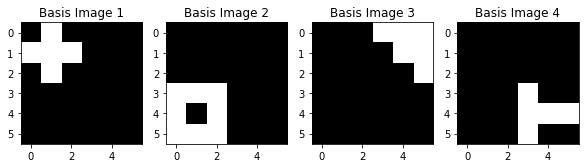

In [2]:
np.random.seed(1)
#We have 4 basis images:
N = 100
D = 36
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4,figsize = (10,4))
b1 = np.array([[0,1,0,0,0,0],
               [1,1,1,0,0,0],
               [0,1,0,0,0,0],
               [0,0,0,0,0,0],
               [0,0,0,0,0,0],
               [0,0,0,0,0,0]])

ax1.imshow(b1,cmap = "gray")
ax1.set_title("Basis Image 1")


b2 = np.array([[0,0,0,0,0,0],
               [0,0,0,0,0,0],
               [0,0,0,0,0,0],
               [1,1,1,0,0,0],
               [1,0,1,0,0,0],
               [1,1,1,0,0,0]])

ax2.imshow(b2,cmap = "gray")
ax2.set_title("Basis Image 2")


b3 = np.array([[0,0,0,1,1,1],
               [0,0,0,0,1,1],
               [0,0,0,0,0,1],
               [0,0,0,0,0,0],
               [0,0,0,0,0,0],
               [0,0,0,0,0,0]])

ax3.imshow(b3,cmap = "gray")
ax3.set_title("Basis Image 3")

b4 = np.array([[0,0,0,0,0,0],
               [0,0,0,0,0,0],
               [0,0,0,0,0,0],
               [0,0,0,1,0,0],
               [0,0,0,1,1,1],
               [0,0,0,1,0,0]])

ax4.imshow(b4,cmap = "gray")
ax4.set_title("Basis Image 4")
pass

b1 = b1.reshape(D)
b2 = b2.reshape(D)
b3 = b3.reshape(D)
b4 = b4.reshape(D)
sigmaX = 0.5

#Create X from basis vectors
zb1 = np.outer(np.random.binomial(1,.5,100),b1)
zb2 = np.outer(np.random.binomial(1,.5,100),b2)
zb3 = np.outer(np.random.binomial(1,.5,100),b3)
zb4 = np.outer(np.random.binomial(1,.5,100),b4)

X = zb1 + zb2 + zb3 + zb4
#Add noise
X = X + np.random.normal(0,sigmaX,(N,D))

### Simulation: Run the Gibbs Sampler for X

In [3]:
np.random.seed(4)
Ks,Alpha,SXs,SAs,Z = sampler(X,alpha = 1,niter = 1000,epsilon = .05,sigma_X = 1,sigma_A = 1,alpha_a_prior = 1,alpha_b_prior = 1,max_new = 4)

### Results: Plot the Posterior Mean of the Feature Matrix

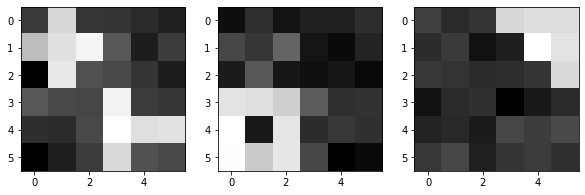

In [4]:
A = np.linalg.inv(Z.T @ Z + SXs[999]**2 / SAs[999]**2 * np.eye(int(Ks[999]))) @ Z.T @ X
fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize = (10,4))
ax1.imshow(A[0].reshape(6,6),cmap = "gray")
ax2.imshow(A[1].reshape(6,6),cmap = "gray")
ax3.imshow(A[2].reshape(6,6),cmap = "gray")
pass

### Results: Plot the values of K, $\alpha$, $\sigma_X$,$\sigma_A$ over the iterations

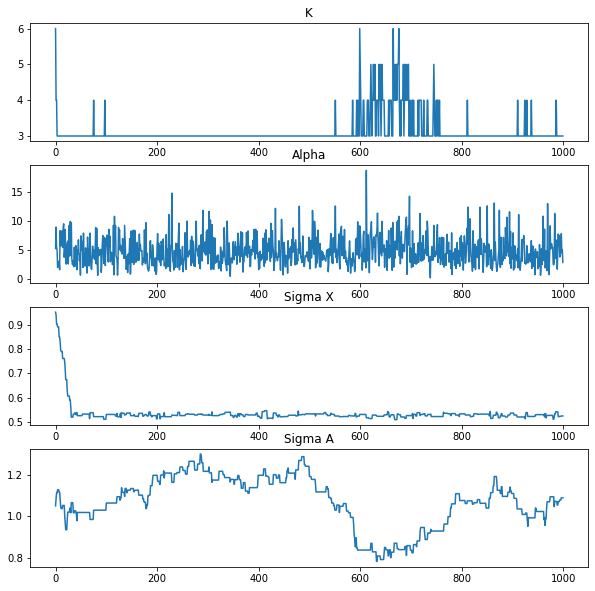

In [5]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, 1,figsize = (10,10))
ax1.plot(Ks)
ax1.set_title("K")
ax2.plot(Alpha)
ax2.set_title("Alpha")
ax3.plot(SXs)
ax3.set_title("Sigma X")
ax4.plot(SAs)
ax4.set_title("Sigma A")
pass

## Simulation 2

### Setup: Create X using the basis images mentioned in the paper

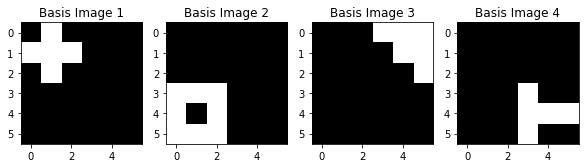

In [6]:
np.random.seed(1)
#We have 4 basis images:
N = 100
D = 36
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4,figsize = (10,4))
b1 = np.array([[0,1,0,0,0,0],
               [1,1,1,0,0,0],
               [0,1,0,0,0,0],
               [0,0,0,0,0,0],
               [0,0,0,0,0,0],
               [0,0,0,0,0,0]])

ax1.imshow(b1,cmap = "gray")
ax1.set_title("Basis Image 1")


b2 = np.array([[0,0,0,0,0,0],
               [0,0,0,0,0,0],
               [0,0,0,0,0,0],
               [1,1,1,0,0,0],
               [1,0,1,0,0,0],
               [1,1,1,0,0,0]])

ax2.imshow(b2,cmap = "gray")
ax2.set_title("Basis Image 2")


b3 = np.array([[0,0,0,1,1,1],
               [0,0,0,0,1,1],
               [0,0,0,0,0,1],
               [0,0,0,0,0,0],
               [0,0,0,0,0,0],
               [0,0,0,0,0,0]])

ax3.imshow(b3,cmap = "gray")
ax3.set_title("Basis Image 3")

b4 = np.array([[0,0,0,0,0,0],
               [0,0,0,0,0,0],
               [0,0,0,0,0,0],
               [0,0,0,1,0,0],
               [0,0,0,1,1,1],
               [0,0,0,1,0,0]])

ax4.imshow(b4,cmap = "gray")
ax4.set_title("Basis Image 4")
pass

b1 = b1.reshape(D)
b2 = b2.reshape(D)
b3 = b3.reshape(D)
b4 = b4.reshape(D)
sigmaX = 0.5

#Create X from basis vectors
zb1 = np.outer(np.random.binomial(1,.5,100),b1)
zb2 = np.outer(np.random.binomial(1,.5,100),b2)
zb3 = np.outer(np.random.binomial(1,.5,100),b3)
zb4 = np.outer(np.random.binomial(1,.5,100),b4)

X = zb1 + zb2 + zb3 + zb4
#Add noise
X = X + np.random.normal(0,sigmaX,(N,D))

### Simulation: Run the Gibbs Sampler for X

In [7]:
np.random.seed(8)
Ks,Alpha,SXs,SAs,Z = sampler(X,alpha = 1,niter = 1000,epsilon = .05,sigma_X = 1,sigma_A = 1,alpha_a_prior = 1,alpha_b_prior = 1,max_new = 4)

### Results: Plot the Posterior Mean of the Feature Matrix

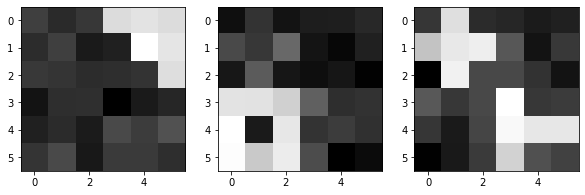

In [8]:
A = np.linalg.inv(Z.T @ Z + SXs[999]**2 / SAs[999]**2 * np.eye(int(Ks[999]))) @ Z.T @ X
fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize = (10,4))
ax1.imshow(A[0].reshape(6,6),cmap = "gray")
ax2.imshow(A[1].reshape(6,6),cmap = "gray")
ax3.imshow(A[2].reshape(6,6),cmap = "gray")
pass

### Results: Plot the values of K, $\alpha$, $\sigma_X$,$\sigma_A$ over the iterations

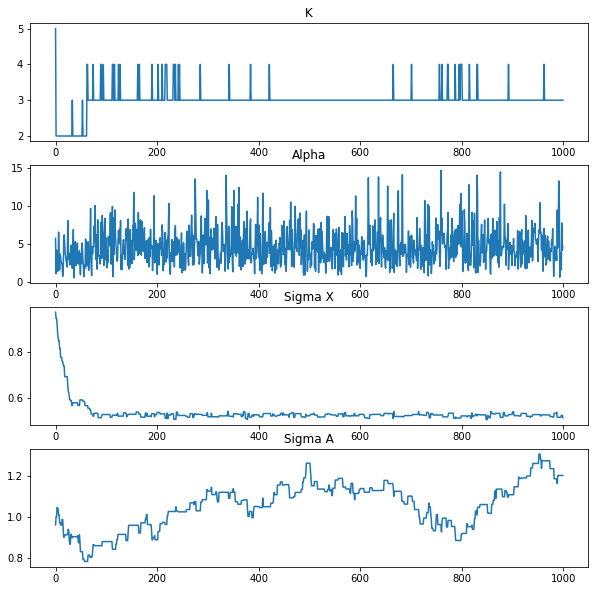

In [9]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, 1,figsize = (10,10))
ax1.plot(Ks)
ax1.set_title("K")
ax2.plot(Alpha)
ax2.set_title("Alpha")
ax3.plot(SXs)
ax3.set_title("Sigma X")
ax4.plot(SAs)
ax4.set_title("Sigma A")
pass